<a href="https://colab.research.google.com/github/Ankita-Rane/Logistics-Regression-Model/blob/main/IITM_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
census=pd.read_csv('/content/census-income.csv')

In [ ]:
census.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
census.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


##EDA

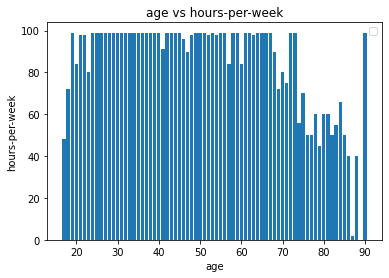

In [ ]:
#simple bar plot
plt.bar(census['age'], census['hours-per-week'])
plt.xlabel('age')
plt.ylabel('hours-per-week')
plt.title("age vs hours-per-week")
plt.legend()

In [ ]:
#Removing Null values before answering questions
census.replace('?','None',inplace=True)
census_2=census[(census['workclass']!='None')|(census['occupation']!='None')|(census['native-country']!='None')]
census_2.shape

(32534, 15)

1. How many types of occupations do we have?
a. 13
b. 14
c. 15
d. 11

Ans : c

In [ ]:
census_2['occupation'].nunique()

15

2. How many people are working as tech support and have an annual income
greater than 50k?
a. 278
b. 389
c. 289
d. 934

Ans : 283 is the right ans .not available in options

In [ ]:
census_2['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'None', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [ ]:
census_2['annual_income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
census_2[(census_2["occupation"]=='Tech-support')&(census_2['annual_income']=='>50K')]['occupation'].count()

283

3. How many total missing values are present in the dataset?
a. 4262
b. 5000
c. 5349
d. 4302

Ans: 4262

In [ ]:
(census=='None').sum().sum()

4262

4. If there are missing values in the Marital Status column, which option among
the following should be used for replacing the missing values:
a. Mean
b. Median
c. Mode
d. All of the above

Ans: d

In [ ]:
census_2['marital-status'].isnull().values.sum()

0

5. How many people are having private work classes and are not from the
United States of America?
a. 2151
b. 2300
c. 2000
d. 2190

Ans : ans is 2561 and is not in the options

In [ ]:
census_2['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'None', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [ ]:
census_2[(census_2["workclass"]=='Private')&(census_2['native-country']!='United-States')]['workclass'].count()

2561

6. How many people are either having Annual Income(last column) less than or
equal to 50k or their working hours is greater than or equal to 40 hrs:
a. 23008
b. 23448
c. 29505
d. 25903

Ans: ans is not in the options. ans is 31823

In [ ]:
census_2[(census_2["annual_income"]=='<=50K')|(census_2['hours-per-week']>=40)]['workclass'].count()

31797

7. Which of the following methods can you use for handling outliers?
a. Interquartile Range(IQR) Method
b. Z Score method
c. Both of the above methods
d. None of the above

Ans: c

8. Chi-square is used to analyze:
a. Determine the relationship b/w the variables
b. Compare observed results with expected results
c. both a and b
d. None of the above

Ans: c

9. What is VIF?
a. It can detect multicollinearity
b. If the VIF value is greater than 10, then there is no correlation between
the independent variables
c. It stands for Variance Impact Factor
d. VIF is when there is no correlation between one predictor and the other
predictors in a model

Ans: a

10.What predict_proba will tell you?
a. It will predict the class probabilities
b. It will tell you the target value
c. Both are correct
d. None of the above

ANS : C

11.Logistic regression is useful for regression problems:
a. True
b. False

Ans : b

12.In logistic regression, if the predicted logit is 0, what’s the
transformed probability?
a. 0.5
b. 0.05
c. Both of the above
d. None of the above

Ans : a

:13.Which variant of logistic regression is recommended when you have a categorical dependent variable with more than two values?
a. Multiple Logistic regression
b. Multinomial logistic regression
c. Ordered logit regression
d. Poisson regression

Ans:b

##Perform the following tasks for answering the remaining questions

● Rename the last column as Annual Income
● Remove the missing values from the dataset
● Change the labels of categorical data into numerical data using Label
Encoder.
● Split the dataset into a train and test of proportions 70:30 and set the random state to 0.
● Build a Logistic Regression Model on the data.
Answer the following questions with the help of the above-created model.


● Rename the last column as Annual Income

In [ ]:
census.rename(columns={'annual_income':'Annual Income'}, inplace=True)

In [ ]:
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Annual Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


● Remove the missing values from the *dataset*



In [ ]:
census.shape

(32561, 15)

In [ ]:
census.replace('?','None',inplace=True)

In [ ]:
census['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'None', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
census.apply(lambda row: row.astype(str).str.contains('None').any(), axis=0)

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
Annual Income     False
dtype: bool

In [ ]:
census_1=census[(census['workclass']!='None')|(census['occupation']!='None')|(census['native-country']!='None')]
census_1.shape

(32534, 15)

##outlier detection

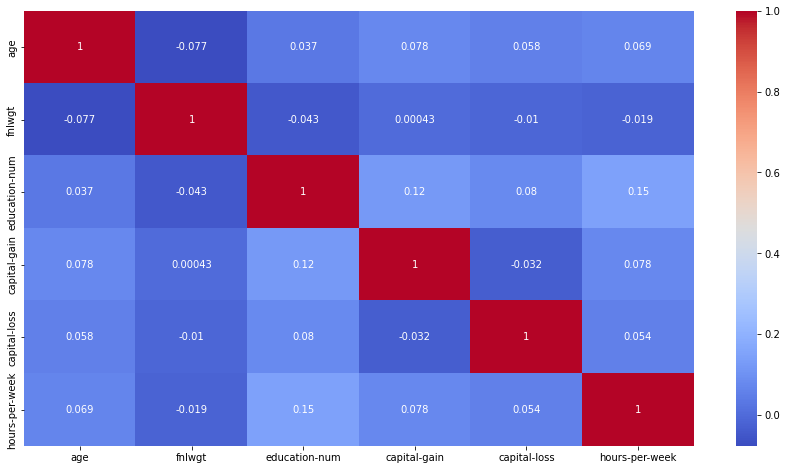

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(15,8))
sns.heatmap(census.corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
col_list = census_1.columns.values.tolist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


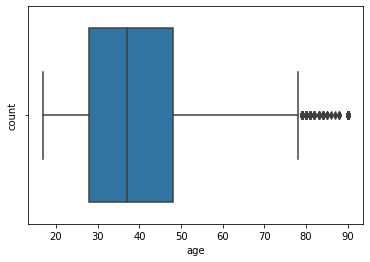

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


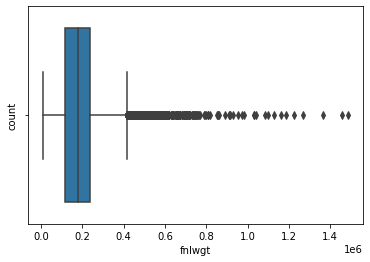

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


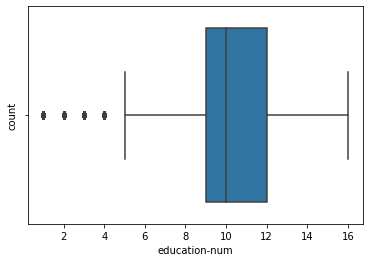

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


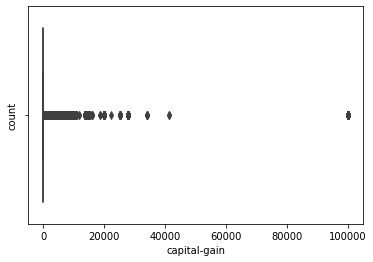

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


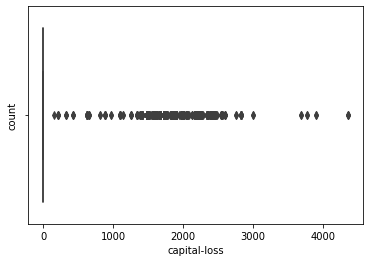

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


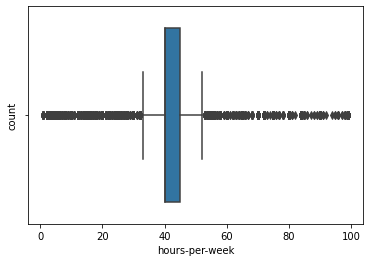

In [ ]:
for col_name in col_list:
    if(census_1[col_name].dtypes=='int64' or census_1[col_name].dtypes=='float64'):
        sns.boxplot(census_1[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in census_1.columns:
    if ((census_1[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = census_1[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

          feature        VIF
0             age   7.249886
1          fnlwgt   3.683546
2   education-num  10.992054
3    capital-gain   1.032986
4    capital-loss   1.056818
5  hours-per-week   9.766244


In [ ]:
census_1.drop(columns={'education-num'},axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
census_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32534 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32534 non-null  int64 
 1   workclass       32534 non-null  object
 2   fnlwgt          32534 non-null  int64 
 3   education       32534 non-null  object
 4   marital-status  32534 non-null  object
 5   occupation      32534 non-null  object
 6   relationship    32534 non-null  object
 7   race            32534 non-null  object
 8   sex             32534 non-null  object
 9   capital-gain    32534 non-null  int64 
 10  capital-loss    32534 non-null  int64 
 11  hours-per-week  32534 non-null  int64 
 12  native-country  32534 non-null  object
 13  Annual Income   32534 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.7+ MB


In [ ]:
col_list = []
for col in census_1.columns:
    if ((census_1[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = census_1[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

          feature       VIF
0             age  6.091994
1          fnlwgt  3.466296
2    capital-gain  1.030128
3    capital-loss  1.054330
4  hours-per-week  6.798619


In [ ]:
census_1.drop(columns={'hours-per-week'},axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
census_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32534 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32534 non-null  int64 
 1   workclass       32534 non-null  object
 2   fnlwgt          32534 non-null  int64 
 3   education       32534 non-null  object
 4   marital-status  32534 non-null  object
 5   occupation      32534 non-null  object
 6   relationship    32534 non-null  object
 7   race            32534 non-null  object
 8   sex             32534 non-null  object
 9   capital-gain    32534 non-null  int64 
 10  capital-loss    32534 non-null  int64 
 11  native-country  32534 non-null  object
 12  Annual Income   32534 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.5+ MB


In [ ]:
col_list = []
for col in census_1.columns:
    if ((census_1[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = census_1[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

        feature       VIF
0           age  3.009797
1        fnlwgt  2.929379
2  capital-gain  1.028324
3  capital-loss  1.051492


● Change the labels of categorical data into numerical data using Label
Encoder.

In [ ]:
census_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32534 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32534 non-null  int64 
 1   workclass       32534 non-null  object
 2   fnlwgt          32534 non-null  int64 
 3   education       32534 non-null  object
 4   marital-status  32534 non-null  object
 5   occupation      32534 non-null  object
 6   relationship    32534 non-null  object
 7   race            32534 non-null  object
 8   sex             32534 non-null  object
 9   capital-gain    32534 non-null  int64 
 10  capital-loss    32534 non-null  int64 
 11  native-country  32534 non-null  object
 12  Annual Income   32534 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.5+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

census_1["workclass"]=le.fit_transform(census_1["workclass"])
census_1["education"]=le.fit_transform(census_1["education"])
census_1["marital-status"]=le.fit_transform(census_1["marital-status"])
census_1["occupation"]=le.fit_transform(census_1["occupation"])
census_1["relationship"]=le.fit_transform(census_1["relationship"])
census_1["race"]=le.fit_transform(census_1["race"])
census_1["sex"]=le.fit_transform(census_1["sex"])
census_1["native-country"]=le.fit_transform(census_1["native-country"])
census_1["Annual Income"]=le.fit_transform(census_1["Annual Income"])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
census_1.head(2)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,Annual Income
0,39,7,77516,9,4,0,1,4,1,2174,0,39,0
1,50,6,83311,9,2,3,0,4,1,0,0,39,0


In [ ]:
census_1.corr()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,Annual Income
age,1.000000,0.008667,-0.076733,-0.010264,-0.266294,-0.006223,-0.264040,0.028289,0.089022,0.077708,0.057534,0.000177,0.234110
workclass,0.008667,1.000000,-0.018009,0.000989,-0.021016,-0.000557,-0.060485,0.053220,0.076575,0.030537,0.000989,-0.010968,0.002088
fnlwgt,-0.076733,-0.018009,1.000000,-0.028127,0.028068,0.000055,0.009202,-0.021409,0.026760,0.000487,-0.010376,-0.064417,-0.009470
education,-0.010264,0.000989,-0.028127,1.000000,-0.038591,-0.034561,-0.010865,0.014309,-0.027469,0.030062,0.017012,0.077721,0.079329
marital-status,-0.266294,-0.021016,0.028068,-0.038591,1.000000,0.028138,0.186012,-0.067961,-0.129721,-0.043396,-0.034466,-0.023973,-0.199371
occupation,-0.006223,-0.000557,0.000055,-0.034561,0.028138,1.000000,-0.040012,-0.004105,0.043420,0.021146,0.011746,-0.006390,0.045432
relationship,-0.264040,-0.060485,0.009202,-0.010865,0.186012,-0.040012,1.000000,-0.115961,-0.582259,-0.057989,-0.061286,-0.008630,-0.251125
race,0.028289,0.053220,-0.021409,0.014309,-0.067961,-0.004105,-0.115961,1.000000,0.087098,0.011156,0.018732,0.130480,0.071828
sex,0.089022,0.076575,0.026760,-0.027469,-0.129721,0.043420,-0.582259,0.087098,1.000000,0.048504,0.045886,-0.002741,0.216047
capital-gain,0.077708,0.030537,0.000487,0.030062,-0.043396,0.021146,-0.057989,0.011156,0.048504,1.000000,-0.031607,0.005311,0.223337


● Split the dataset into a train and test of proportions 70:30 and set the random state to 0.

In [ ]:
from sklearn.model_selection import train_test_split
census_x=census_1.drop(columns={'Annual Income'})
x=census_x
y=census_1['Annual Income'].values.reshape(-1,1)

In [ ]:
census_x.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country
0,39,7,77516,9,4,0,1,4,1,2174,0,39
1,50,6,83311,9,2,3,0,4,1,0,0,39
2,38,4,215646,11,0,5,1,4,1,0,0,39
3,53,4,234721,1,2,5,0,2,1,0,0,39
4,28,4,338409,9,2,10,5,2,0,0,0,4


In [ ]:
census_1['Annual Income'].unique()

array([0, 1])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
y_train

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

● Build a Logistic Regression Model on the data.


In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()
log_reg_model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg_model, x, y,scoring='accuracy',cv = 10)
scores

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

array([0.79625077, 0.79717271, 0.78242163, 0.80147511, 0.80079926,
       0.79926222, 0.7912696 , 0.80264371, 0.79926222, 0.80295112])

In [ ]:
y_test_pred = log_reg_model.predict(x_test)
y_test_pred

array([0, 0, 0, ..., 0, 1, 0])

14.What is the accuracy score of the above model?
a. 0.60 to 0.70
b. 0.40 to 0.60
c. 0.70 to 0.85
d. None of the above

Ans : C

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.accuracy_score(y_test, y_test_pred))

0.8052453642044872


In [ ]:
print(metrics.confusion_matrix(y_test, y_test_pred))
confusion_matrix=metrics.confusion_matrix(y_test, y_test_pred)

[[7203  224]
 [1677  657]]


15.What is the specificity of the above model?

a. 0.20 to 0.30
b. 0.30 to 0.40
c. 0.50 to 0.60
d. None of the above

Ans :d  right ans 0.74

In [ ]:
FP = confusion_matrix[0][1]
FN =  confusion_matrix[1][0]
TP = confusion_matrix[0][0]
TN = confusion_matrix[1][1]

print(confusion_matrix)
print("FP",FP)
print("TP",TP)
print("TN",TN)
print("FN",FN)

#[TP,FP]
#[FN,TN]

[[7203  224]
 [1677  657]]
FP 224
TP 7203
TN 657
FN 1677


In [ ]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
print("Sensitivity, hit rate, recall, or true positive rate:",TPR)
print("Specificity or true negative rate:",TNR)
print("Precision or positive predictive value:",PPV)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy :",ACC)



Sensitivity, hit rate, recall, or true positive rate: 0.8111486486486487
Specificity or true negative rate: 0.7457434733257662
Precision or positive predictive value: 0.9698397737983034
Accuracy : 0.8052453642044872


16.What is the model’s precision when the target is False?

a. 0.60 to 0.70
b. 0.40 to 0.60
c. 0.70 to 0.80
d. None of the above

Ans : C

17.What is the total support value from the above model?

a. 9049
b. 9032
c. 10000
d. 9847

Ans: 9761 is the correct ans not in options

18.What is the f1 score of the above model when the target is
True?

a. 0.30 to 0.40
b. 0.40 to 0.50
c. 0.60 to 0.70
d. 0.90 to 0.99

Ans: b

19.How many records are correctly classified by the
model?

a. 7173
b. 7043
c. 7000
d. None of the above

Ans: d 

TP+TN = 7203+657 = 7860

In [ ]:
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7427
           1       0.75      0.28      0.41      2334

    accuracy                           0.81      9761
   macro avg       0.78      0.63      0.65      9761
weighted avg       0.80      0.81      0.77      9761



In [ ]:
#predict proba
proba_valid = pd.DataFrame(log_reg_model.predict_proba(x_test)[:, 1])

In [ ]:
x_test

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,Annual Income
24192,34,4,37210,11,4,0,3,4,1,0,0,39,0
26476,35,4,193961,9,2,10,0,1,1,0,0,30,1
26847,42,4,319588,9,3,14,1,4,1,0,0,39,0
8803,23,1,203353,9,4,3,3,4,0,0,0,39,0
27182,58,0,139290,9,2,0,0,4,1,0,0,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11551,28,4,197484,11,4,5,3,4,1,0,0,39,0
25758,58,4,225394,11,2,2,0,4,1,0,1902,39,0
16011,39,4,186420,11,0,0,1,4,0,0,0,39,0
11149,42,4,94600,11,2,2,0,4,1,5178,0,39,1


In [ ]:
log_reg_model.predict_proba(x_test)

array([[3.82565691e-01, 6.66404342e-03, 2.74360292e-09, ...,
        4.73446098e-03, 1.38683215e-08, 2.05035660e-12],
       [9.99999895e-01, 7.10563568e-10, 3.68861538e-43, ...,
        1.19587888e-10, 1.71795044e-39, 1.86311109e-59],
       [1.00000000e+00, 8.47187366e-16, 1.21610243e-70, ...,
        4.49576310e-17, 1.34570401e-64, 1.71079320e-97],
       ...,
       [9.99999773e-01, 1.60833942e-09, 1.64330327e-41, ...,
        2.90102558e-10, 5.51125215e-38, 3.56997245e-57],
       [1.92163222e-20, 4.59970081e-03, 2.99016731e-19, ...,
        5.21875751e-03, 2.69445177e-17, 5.51400513e-20],
       [1.00000000e+00, 2.07668068e-12, 6.48020601e-55, ...,
        2.13330029e-13, 3.13286616e-50, 1.00053640e-75]])

In [ ]:
proba_valid

,0
0,6.664043e-03
1,7.105636e-10
2,8.471874e-16
3,2.564772e-10
4,2.674098e-07
...,...
9756,4.845748e-10
9757,9.569129e-12
9758,1.608339e-09
9759,4.599701e-03


In [ ]:
df_new=pd.DataFrame({'Predictions':y_test_pred})

In [ ]:
df_new.head(2)

,Predictions
0,0
1,0


In [ ]:
df_new.insert(1, "Y_predict_proba", proba_valid)

In [ ]:
df_new.head(2)

,Predictions,Y_predict_proba
0,0,6.664043e-03
1,0,7.105636e-10


In [ ]:
df_new['Y_pred_0.1']=np.where((df_new['Y_predict_proba']>0.1), 1,0)
df_new

,Predictions,Y_predict_proba,Y_pred_0.1
0,0,6.664043e-03,0
1,0,7.105636e-10,0
2,0,8.471874e-16,0
3,0,2.564772e-10,0
4,0,2.674098e-07,0
...,...,...,...
9756,0,4.845748e-10,0
9757,0,9.569129e-12,0
9758,0,1.608339e-09,0
9759,7688,4.599701e-03,0


In [ ]:
df_new['Y_pred_0.2']=np.where(df_new['Y_predict_proba']>0.2,1,0)
df_new['Y_pred_0.3']=np.where(df_new['Y_predict_proba']>0.3, 1,0)
df_new['Y_pred_0.4']=np.where(df_new['Y_predict_proba']>0.4, 1,0)
df_new['Y_pred_0.5']=np.where(df_new['Y_predict_proba']>0.5, 1,0)
df_new['Y_pred_0.6']=np.where(df_new['Y_predict_proba']>0.6, 1,0)
df_new['Y_pred_0.7']=np.where(df_new['Y_predict_proba']>0.7, 1,0)
df_new['Y_pred_0.8']=np.where(df_new['Y_predict_proba']>0.8, 1,0)
df_new['Y_pred_0.9']=np.where(df_new['Y_predict_proba']>0.9, 1,0)

df_new

,Predictions,Y_predict_proba,Y_pred_0.1,Y_pred_0.2,Y_pred_0.3,Y_pred_0.4,Y_pred_0.5,Y_pred_0.6,Y_pred_0.7,Y_pred_0.8,Y_pred_0.9
0,0,6.664043e-03,0,0,0,0,0,0,0,0,0
1,0,7.105636e-10,0,0,0,0,0,0,0,0,0
2,0,8.471874e-16,0,0,0,0,0,0,0,0,0
3,0,2.564772e-10,0,0,0,0,0,0,0,0,0
4,0,2.674098e-07,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9756,0,4.845748e-10,0,0,0,0,0,0,0,0,0
9757,0,9.569129e-12,0,0,0,0,0,0,0,0,0
9758,0,1.608339e-09,0,0,0,0,0,0,0,0,0
9759,7688,4.599701e-03,0,0,0,0,0,0,0,0,0


Confusion Matrix



In [ ]:
from sklearn.metrics import confusion_matrix
c1=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.5'])
c1

array([[8969,    0,    0,    0,    0,    0,    0],
       [ 115,    0,    0,    0,    0,    0,    0],
       [  58,    0,    0,    0,    0,    0,    0],
       [ 304,    0,    0,    0,    0,    0,    0],
       [ 225,    0,    0,    0,    0,    0,    0],
       [   9,    0,    0,    0,    0,    0,    0],
       [  81,    0,    0,    0,    0,    0,    0]])

In [ ]:
sen=c1[0,0]/(c1[0,0]+c1[0,1])
sen

1.0

In [ ]:
sep=c1[1,1]/(c1[1,1]+c1[1,0])
sep

0.0

In [ ]:
d11=pd.DataFrame(columns=['cutoff','Sensitivity','Specificity'])

In [ ]:
d11=d11.append({'cutoff':0.2, 'Sensitivity': sen,'Specificity':sep}, ignore_index=True)

In [ ]:
c1=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.1'])
c2=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.2'])
c3=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.3'])
c4=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.4'])
c5=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.5'])
c6=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.6'])
c7=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.7'])
c8=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.8'])
c9=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.9'])

In [ ]:
sen1=c1[0,0]/(c1[0,0]+c1[0,1])
sen2=c2[0,0]/(c2[0,0]+c2[0,1])
sen3=c3[0,0]/(c3[0,0]+c3[0,1])
sen4=c4[0,0]/(c4[0,0]+c4[0,1])
sen5=c5[0,0]/(c5[0,0]+c5[0,1])
sen6=c6[0,0]/(c6[0,0]+c6[0,1])
sen7=c7[0,0]/(c7[0,0]+c7[0,1])
sen8=c8[0,0]/(c8[0,0]+c8[0,1])
sen9=c9[0,0]/(c9[0,0]+c9[0,1])

In [ ]:
sep1=c1[1,1]/(c1[1,1]+c1[1,0])
sep2=c2[1,1]/(c2[1,1]+c2[1,0])
sep3=c3[1,1]/(c3[1,1]+c3[1,0])
sep4=c4[1,1]/(c4[1,1]+c4[1,0])
sep5=c5[1,1]/(c5[1,1]+c5[1,0])
sep6=c6[1,1]/(c6[1,1]+c6[1,0])
sep7=c7[1,1]/(c7[1,1]+c7[1,0])
sep8=c8[1,1]/(c8[1,1]+c8[1,0])
sep9=c9[1,1]/(c9[1,1]+c9[1,0])

In [ ]:
d_cutoff_value=pd.DataFrame(columns=['cutoff','Sensitivity','Specificity'])
d_cutoff_value

,cutoff,Sensitivity,Specificity


cutoff	Sensitivity	Specificity


In [ ]:
d_cutoff_value=d_cutoff_value.append({'cutoff':0.1, 'Sensitivity': sen1,'Specificity':sep1}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.2, 'Sensitivity': sen2,'Specificity':sep2}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.3, 'Sensitivity': sen3,'Specificity':sep3}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.4, 'Sensitivity': sen4,'Specificity':sep4}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.5, 'Sensitivity': sen5,'Specificity':sep5}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.6, 'Sensitivity': sen6,'Specificity':sep6}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.7, 'Sensitivity': sen7,'Specificity':sep7}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.8, 'Sensitivity': sen8,'Specificity':sep8}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.9, 'Sensitivity': sen9,'Specificity':sep9}, ignore_index=True)
d_cutoff_value

,cutoff,Sensitivity,Specificity
0,0.1,1.0,0.0
1,0.2,1.0,0.0
2,0.3,1.0,0.0
3,0.4,1.0,0.0
4,0.5,1.0,0.0
5,0.6,1.0,0.0
6,0.7,1.0,0.0
7,0.8,1.0,0.0
8,0.9,1.0,0.0


In [ ]:
for i in range(9):
    d_cutoff_value.loc[i,'Total_val']=d_cutoff_value.loc[i,'Sensitivity']+d_cutoff_value.loc[i,'Specificity']
d_cutoff_value

,cutoff,Sensitivity,Specificity,Total_val
0,0.1,1.0,0.0,1.0
1,0.2,1.0,0.0,1.0
2,0.3,1.0,0.0,1.0
3,0.4,1.0,0.0,1.0
4,0.5,1.0,0.0,1.0
5,0.6,1.0,0.0,1.0
6,0.7,1.0,0.0,1.0
7,0.8,1.0,0.0,1.0
8,0.9,1.0,0.0,1.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
test_pred_prob = log_reg_model.predict_proba(x_test)
test_pred_prob

array([[3.82565691e-01, 6.66404342e-03, 2.74360292e-09, ...,
        4.73446098e-03, 1.38683215e-08, 2.05035660e-12],
       [9.99999895e-01, 7.10563568e-10, 3.68861538e-43, ...,
        1.19587888e-10, 1.71795044e-39, 1.86311109e-59],
       [1.00000000e+00, 8.47187366e-16, 1.21610243e-70, ...,
        4.49576310e-17, 1.34570401e-64, 1.71079320e-97],
       ...,
       [9.99999773e-01, 1.60833942e-09, 1.64330327e-41, ...,
        2.90102558e-10, 5.51125215e-38, 3.56997245e-57],
       [1.92163222e-20, 4.59970081e-03, 2.99016731e-19, ...,
        5.21875751e-03, 2.69445177e-17, 5.51400513e-20],
       [1.00000000e+00, 2.07668068e-12, 6.48020601e-55, ...,
        2.13330029e-13, 3.13286616e-50, 1.00053640e-75]])

Logistic: ROC AUC=0.554


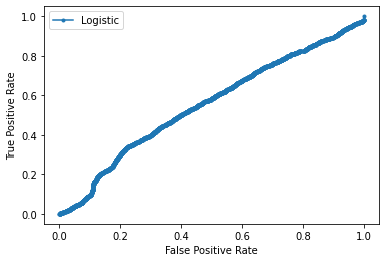

In [ ]:
# roc curve and auc
#Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems.
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# calculate scores->how much data has been understood by the model
auc = roc_auc_score(np.array(y_test), test_pred_prob[:, 1])

# summarize scores

print('Logistic: ROC AUC=%.3f' % (auc))

# calculate roc curves

fpr, tpr, threshold = roc_curve(np.array(y_test), test_pred_prob[:, 1])
# plot the roc curve for the model

pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()